# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machien learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take the following approch:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Defination

In a statement, 
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease/

## 2. Data

The original data came from the Cleaveland data from the UCI Machine learning Repository .
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version available on kaggel. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation (It may change with the progress of the project )

> If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we will pursue the project. 

## 4. Features 

This is where you will get different information about each of the features in your data. 

**Create Data Dictionary** 

1. age in years

2. sex (1 = male ; 0 =female)

3. chest pain type (4 values)

4. resting blood pressure

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved

9. exercise induced angina

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment

12. number of major vessels (0-3) colored by flourosopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. Target (0 or 1)



## Preparing the tools 

We are going to use pandas, matplotlib amd NumPy for data analysis and manipulation

In [1]:
# Import all the tools that we need

# Regular EDA (exploratory data analysis ) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("data-set/heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about data and become a subject matter expert on the dataset you are working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of data?



In [3]:
# Let's find out how many of each class there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
# hmm, this is a very balance dataset each class contains almost the same records 

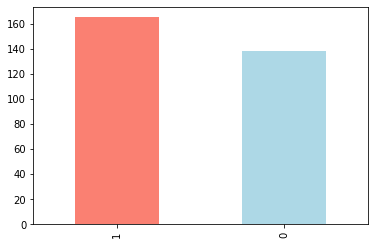

In [5]:
df["target"].value_counts().plot(kind= "bar", color=["salmon", "lightblue"]);

In [6]:

# what are the other columns in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


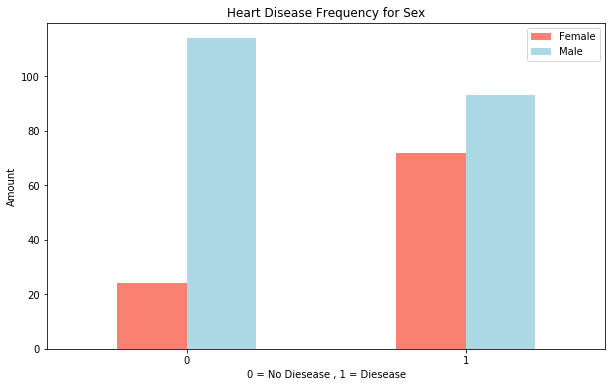

In [11]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10,6), color = ['salmon','lightblue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease , 1 = Diesease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df["thalach"].value_counts()
# if value count give a length of bigger number such as 91. that means it is not a categorical column

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for HEart Disease

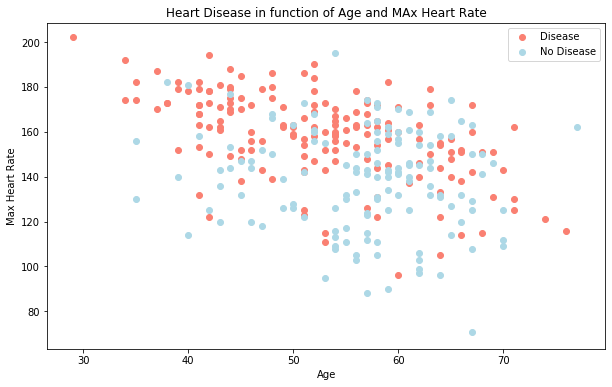

In [14]:
# create another figure 
plt.figure(figsize = (10, 6))

# scatter with postive example 
plt.scatter(df.age[df.target ==1],df.thalach[df.target ==1], c = "salmon");

# scatter woth negative example
plt.scatter(df.age[df.target ==0],df.thalach[df.target ==0], c = "lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and MAx Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

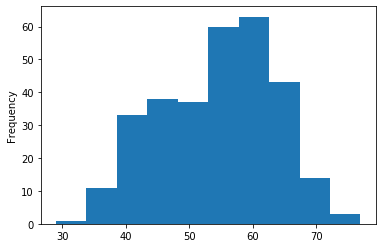

In [15]:
# Check the distribution of Age column with a histogram 
df.age.plot.hist();
# they are no outliers here

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type 

    0: Typical angina
    
    1: Atypical angina
    
    2: Non-anginal pain
    
    3: Asymptomatic

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


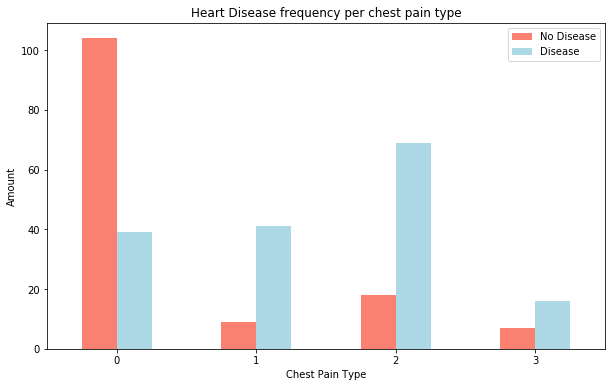

In [17]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10, 6), color = ["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


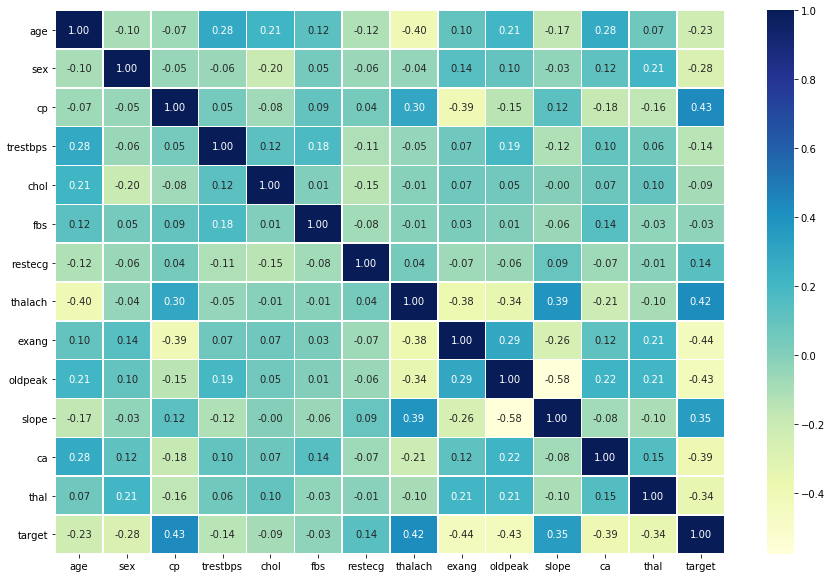

In [20]:
# let's make our corr matrix a little bit prettier 

corr_matrix  = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling 

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and y 
X =  df.drop("target", axis = 1)

y =df["target"]


In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Train Test plit 
np.random.seed(42)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)


In [26]:
# it is shuffeled as expected
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

***Now we have got our data split into trainign and test sets, it is time to build a machine learning model.***

***We will train it (find the patterns) on the trainig set.***

***And we will test it (use the patterns) on the test set.***

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### We are going to  try three different ML model
1. K-Nearest Neighbors Classifier
2. Logistic regression Classifier 
3. Random forest Classifier 

In [27]:
# Put models in a dictionary 

models =  {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models 
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates gvien machine learning models.
    models: a dict of different Sklearn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels 
    y_test : test labels
    
    """
    # Set random seed for reproduciblity 
    np.random.seed(42)
    
    # Make a dictionary to keep model score
    model_scores = {}
    
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and append its scroe to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        

In [28]:
model_score  = fit_and_score(model= models, 
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_score

/home/gagan/Desktop/Ml-Sample/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [29]:
model_compare  = pd.DataFrame(model_score, index = ["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


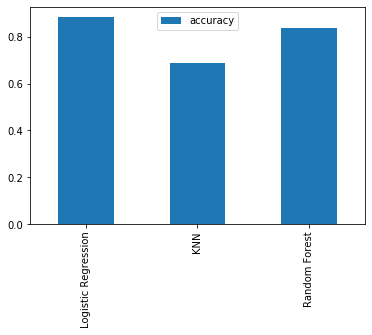

In [30]:
model_compare.T.plot.bar()

Now we have got a baseline model and we know model's first prediction are not always what we should based our next steps off. What should do?

Let's look at the following:
* Hyperparameter tunning 
* Feature Importance 
* Confusion Matrix
* Cross-Validation 
* Precision 
* Recall
* F1 Score
* Classification report
* ROC curve 
* Area under the curve (AUC)

## Hyperparameter Tunning (by hand)


In [31]:
# let's tune KNN
train_scores = []
test_scores = []

# Create a different values of n_neighbors
neighbors  = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algo
    knn.fit(X_train,y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list 
    test_scores.append(knn.score(X_test, y_test))
    

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


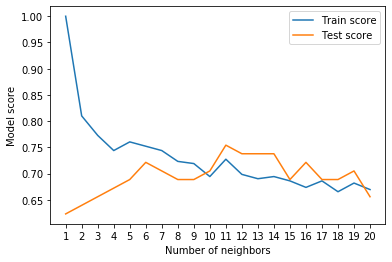

In [43]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tunning with RandomizedSearchCV

We are goin to tune:
* Logistic Regression()
* RandomForestClassifier()

...using RandomizedSearchCV

